Copyright **`(c)`** 2024 Federico Spinoso `<s324617@studenti.polito.it>`  
[`https://github.com/fedspi00/CI2024_lab2`](https://github.com/fedspi00/CI2024_lab2)  

In [160]:
import logging
from itertools import combinations, accumulate
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import networkx as nx
import folium
import matplotlib.pyplot as plt
import random

from icecream import ic

logging.basicConfig(level=logging.DEBUG)

In [161]:
# Function that reads the csv and returns the distance matrix and the cities

def readCSV(path):
    CITIES = pd.read_csv(path, header=None, names=['name', 'lat', 'lon'])
    DIST_MATRIX = np.zeros((len(CITIES), len(CITIES)))
    for c1, c2 in combinations(CITIES.itertuples(), 2):
        DIST_MATRIX[c1.Index, c2.Index] = DIST_MATRIX[c2.Index, c1.Index] = geodesic(
            (c1.lat, c1.lon), (c2.lat, c2.lon)
        ).km
    
    return CITIES, DIST_MATRIX

In [162]:
# Function that calculates the cost of the route

def tsp_cost(tsp, CITIES, DIST_MATRIX):
    assert tsp[0] == tsp[-1]
    assert set(tsp) == set(range(len(CITIES)))

    tot_cost = 0
    for c1, c2 in zip(tsp, tsp[1:]):
        tot_cost += DIST_MATRIX[c1, c2]
        
    return tot_cost


In [163]:
# Function that generates and html file of a country with its respective tsp

def generate_map(tsp, CITIES, path, algorithm):
    tsp_path = CITIES.iloc[tsp]

    map_center = [tsp_path['lat'].mean(), tsp_path['lon'].mean()]
    map = folium.Map(location=map_center, zoom_start=6)

    for idx, row in tsp_path.iterrows():
        folium.Marker(
            location=[row['lat'], row['lon']],
            popup=row['name'],
            tooltip=row['name']
        ).add_to(map)

    coordinates = [(row['lat'], row['lon']) for idx, row in tsp_path.iterrows()]
    folium.PolyLine(coordinates, color="blue", weight=2.5, opacity=1).add_to(map)

    nameFile = path.split("/")[1].split(".")[0]
    map.save("plots" + algorithm + "/" + nameFile + ".html")

In [164]:
# Function that generates a plot of the tsp in output

def plot_map(tsp, CITIES):
    cities = CITIES.loc[tsp]
    latitudes = cities['lat'].values
    longitudes = cities['lon'].values
    city_names = cities['name'].values

    plt.figure(figsize=(14, 12))

    plt.plot(longitudes, latitudes, linestyle='-', color='#1E90FF', linewidth=2)
    plt.scatter(longitudes, latitudes, color='#00008B', s=50)

    for i, city in enumerate(city_names):
        plt.text(longitudes[i], latitudes[i], city, fontsize=10, ha='right')

    plt.title('TSP')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()

In [165]:
# Function that plots the history of the costs

def plotcost(history):
    plt.figure(figsize=(14, 8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, min)),
        color="red",
    ) 
    _ = plt.scatter(range(len(history)), history, marker=".")

## Greedy Algorithm

In [166]:
def greedy_algorithm(CITIES, DIST_MATRIX):    
    visited = np.full(len(CITIES), False)
    dist = DIST_MATRIX.copy()
    city = 0
    visited[city] = True
    tsp = list()
    tsp.append(int(city))
    while not np.all(visited):
        dist[:, city] = np.inf
        closest = np.argmin(dist[city])
        print(f"step: {CITIES.at[city,'name']} -> {CITIES.at[closest,'name']} ({DIST_MATRIX[city,closest]:.2f}km)")
        visited[closest] = True
        city = closest
        tsp.append(int(city))
    print(f"step: {CITIES.at[tsp[-1],'name']} -> {CITIES.at[tsp[0],'name']} ({DIST_MATRIX[tsp[-1],tsp[0]]:.2f}km)")
    tsp.append(tsp[0])


    print(f"result: Found a path of {len(tsp)-1} steps, total length {tsp_cost(tsp, CITIES, DIST_MATRIX):.2f}km")
    
    return tsp

step: Abakan -> Krasnoyarsk (276.58km)
step: Krasnoyarsk -> Achinsk (161.71km)
step: Achinsk -> Kemerovo (296.59km)
step: Kemerovo -> Leninsk‐Kuznetskiy (74.76km)
step: Leninsk‐Kuznetskiy -> Prokopyevsk (91.87km)
step: Prokopyevsk -> Novokuznetsk (30.63km)
step: Novokuznetsk -> Biysk (187.38km)
step: Biysk -> Barnaul (132.82km)
step: Barnaul -> Novosibirsk (194.50km)
step: Novosibirsk -> Tomsk (206.90km)
step: Tomsk -> Seversk (14.97km)
step: Seversk -> Rubtsovsk (613.13km)
step: Rubtsovsk -> Omsk (647.47km)
step: Omsk -> Tobolsk (475.40km)
step: Tobolsk -> Tyumen (200.98km)
step: Tyumen -> Kurgan (189.69km)
step: Kurgan -> Kopeysk (236.87km)
step: Kopeysk -> Chelyabinsk (14.72km)
step: Chelyabinsk -> Miass (87.20km)
step: Miass -> Zlatoust (33.88km)
step: Zlatoust -> Pervouralsk (194.64km)
step: Pervouralsk -> Yekaterinburg (40.19km)
step: Yekaterinburg -> Kamensk‐Uralskiy (95.20km)
step: Kamensk‐Uralskiy -> Nizhniy Tagil (205.75km)
step: Nizhniy Tagil -> Perm (220.37km)
step: Perm ->

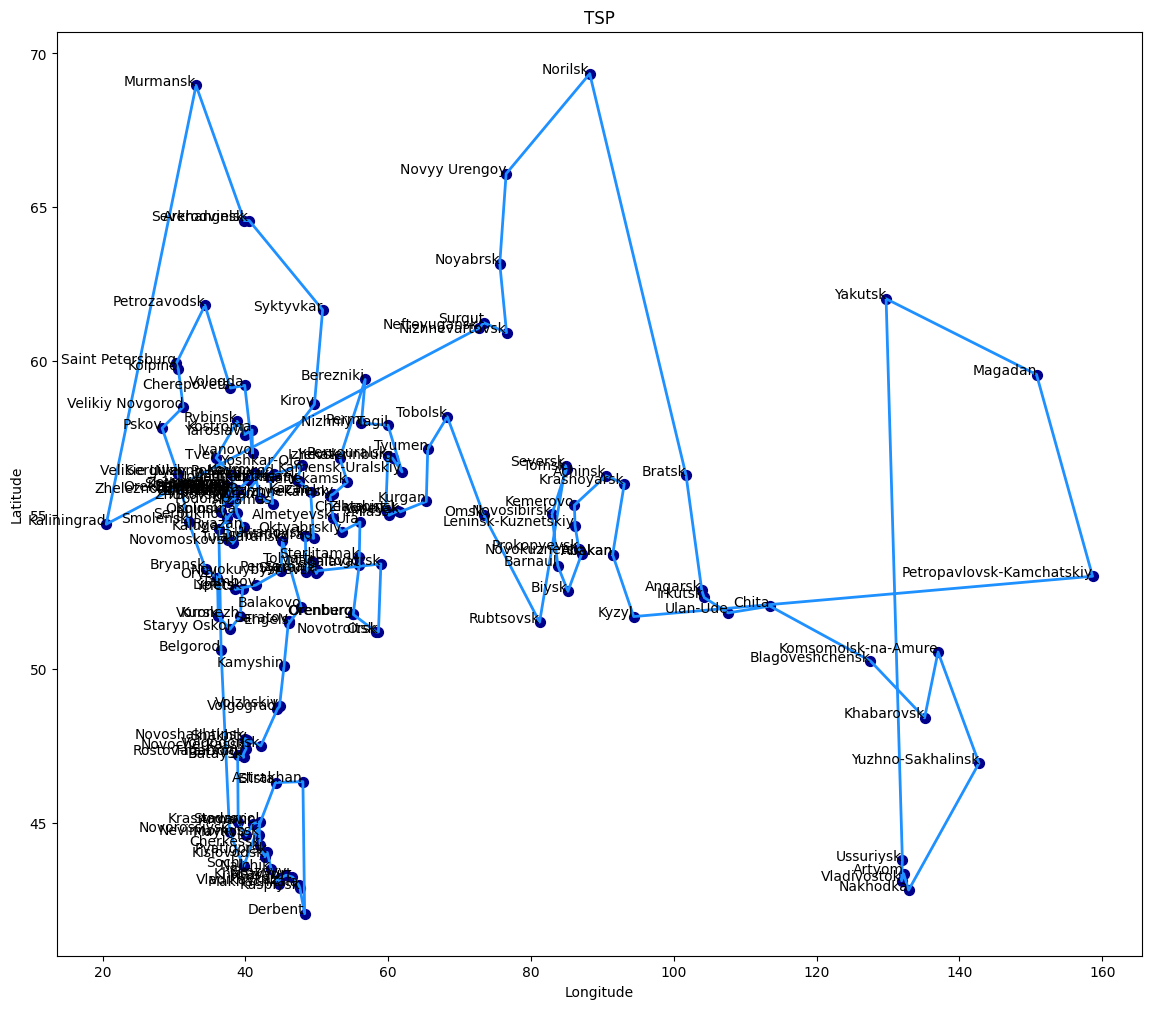

step: Acheng -> Harbin (33.60km)
step: Harbin -> Shuangcheng (53.02km)
step: Shuangcheng -> Yushu (61.85km)
step: Yushu -> Wuchang (47.68km)
step: Wuchang -> Shulan (59.07km)
step: Shulan -> Jishu (17.91km)
step: Jishu -> Jilin city (50.81km)
step: Jilin city -> Jiutai (65.06km)
step: Jiutai -> Dehui (43.68km)
step: Dehui -> Changchun (78.49km)
step: Changchun -> Gongzhuling (59.12km)
step: Gongzhuling -> Siping (54.24km)
step: Siping -> Liaoyuan (71.76km)
step: Liaoyuan -> Meihekou (60.38km)
step: Meihekou -> Panshi (55.16km)
step: Panshi -> Huadian (56.40km)
step: Huadian -> Jiaohe (96.49km)
step: Jiaohe -> Dunhua (82.15km)
step: Dunhua -> Helong (110.22km)
step: Helong -> Longjing (42.88km)
step: Longjing -> Yanji (14.70km)
step: Yanji -> Tumen (26.45km)
step: Tumen -> Huichun (46.09km)
step: Huichun -> Ningan (179.31km)
step: Ningan -> Hailin (26.54km)
step: Hailin -> Mudanjiang (18.30km)
step: Mudanjiang -> Muleng (81.67km)
step: Muleng -> Hengshan (43.08km)
step: Hengshan -> Jixi

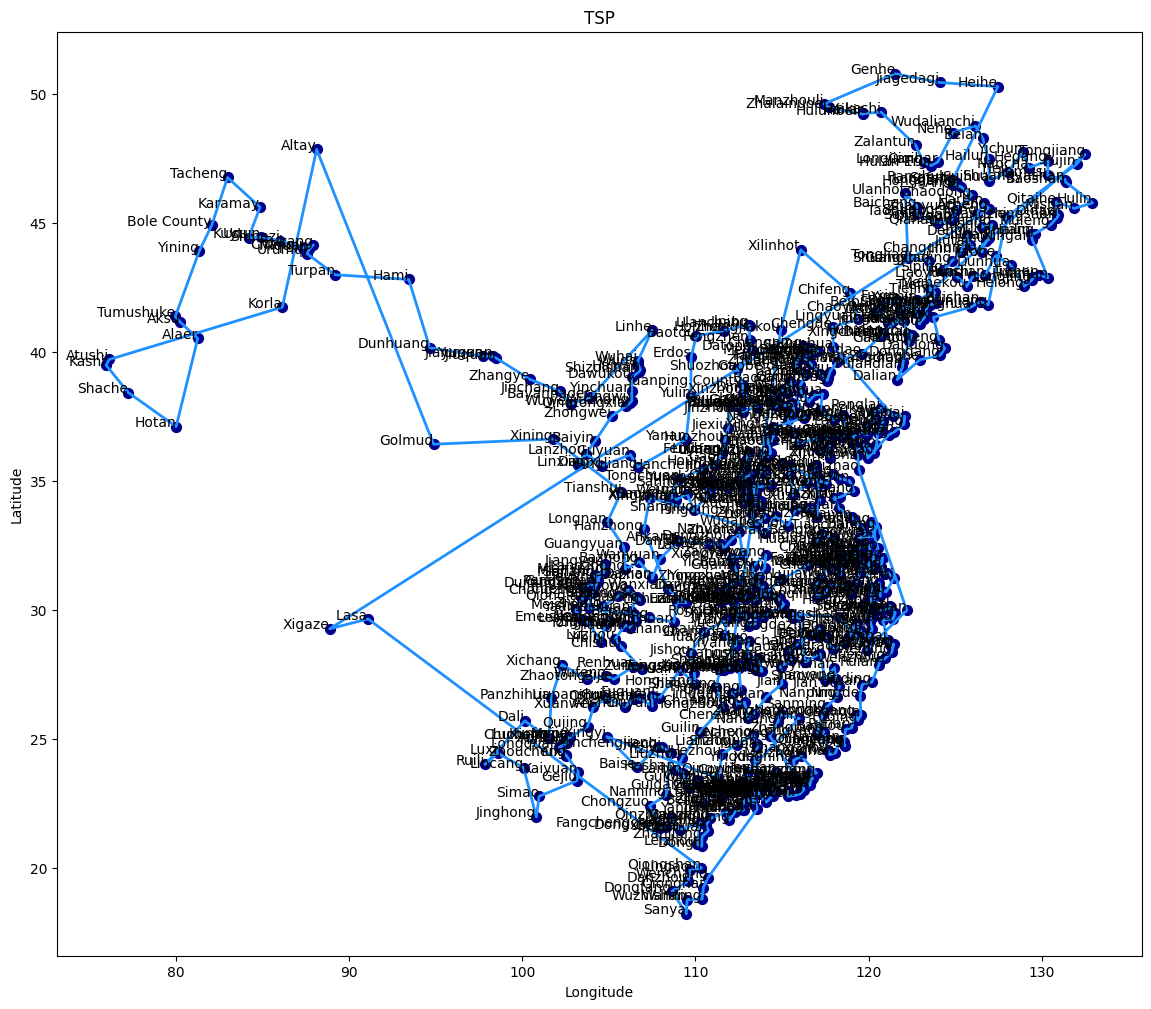

step: Ancona -> Rimini (90.60km)
step: Rimini -> Forlì (46.72km)
step: Forlì -> Ravenna (26.46km)
step: Ravenna -> Ferrara (66.67km)
step: Ferrara -> Bologna (43.43km)
step: Bologna -> Modena (37.29km)
step: Modena -> Reggio nell'Emilia (23.94km)
step: Reggio nell'Emilia -> Parma (26.94km)
step: Parma -> Piacenza (57.65km)
step: Piacenza -> Milan (60.65km)
step: Milan -> Monza (14.51km)
step: Monza -> Bergamo (33.92km)
step: Bergamo -> Brescia (46.02km)
step: Brescia -> Verona (61.42km)
step: Verona -> Vicenza (44.70km)
step: Vicenza -> Padua (30.13km)
step: Padua -> Venice (36.07km)
step: Venice -> Trieste (115.09km)
step: Trieste -> Bolzano (209.68km)
step: Bolzano -> Trento (49.94km)
step: Trento -> Novara (206.69km)
step: Novara -> Turin (84.46km)
step: Turin -> Genoa (123.19km)
step: Genoa -> Leghorn (146.37km)
step: Leghorn -> Prato (74.02km)
step: Prato -> Florence (17.17km)
step: Florence -> Perugia (119.19km)
step: Perugia -> Terni (63.64km)
step: Terni -> Rome (76.54km)
step:

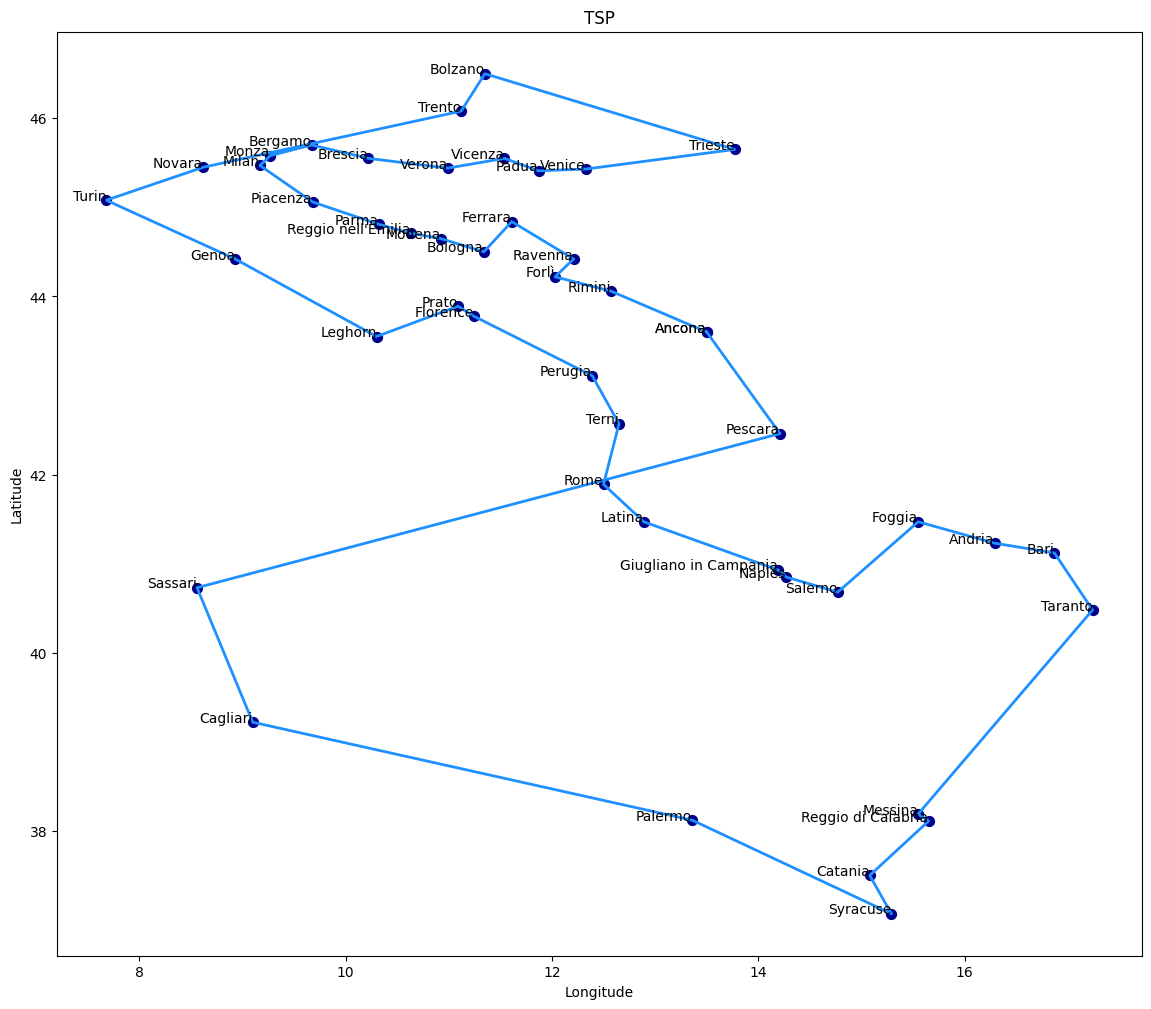

step: Abilene -> Wichita Falls (196.78km)
step: Wichita Falls -> Denton (149.68km)
step: Denton -> Lewisville (23.92km)
step: Lewisville -> Carrollton (10.02km)
step: Carrollton -> Plano (15.78km)
step: Plano -> Allen (9.27km)
step: Allen -> McKinney (10.45km)
step: McKinney -> Frisco (15.17km)
step: Frisco -> Richardson (22.38km)
step: Richardson -> Garland (10.04km)
step: Garland -> Mesquite (16.57km)
step: Mesquite -> Dallas (16.56km)
step: Dallas -> Irving (20.41km)
step: Irving -> Grand Prairie (19.83km)
step: Grand Prairie -> Fort Worth (32.28km)
step: Fort Worth -> Waco (136.07km)
step: Waco -> Killeen (74.58km)
step: Killeen -> Round Rock (61.72km)
step: Round Rock -> Austin (25.47km)
step: Austin -> San Antonio (118.67km)
step: San Antonio -> Corpus Christi (220.93km)
step: Corpus Christi -> Edinburg (175.38km)
step: Edinburg -> McAllen (13.47km)
step: McAllen -> Brownsville (82.29km)
step: Brownsville -> Laredo (263.79km)
step: Laredo -> Sugar Land (440.43km)
step: Sugar Land

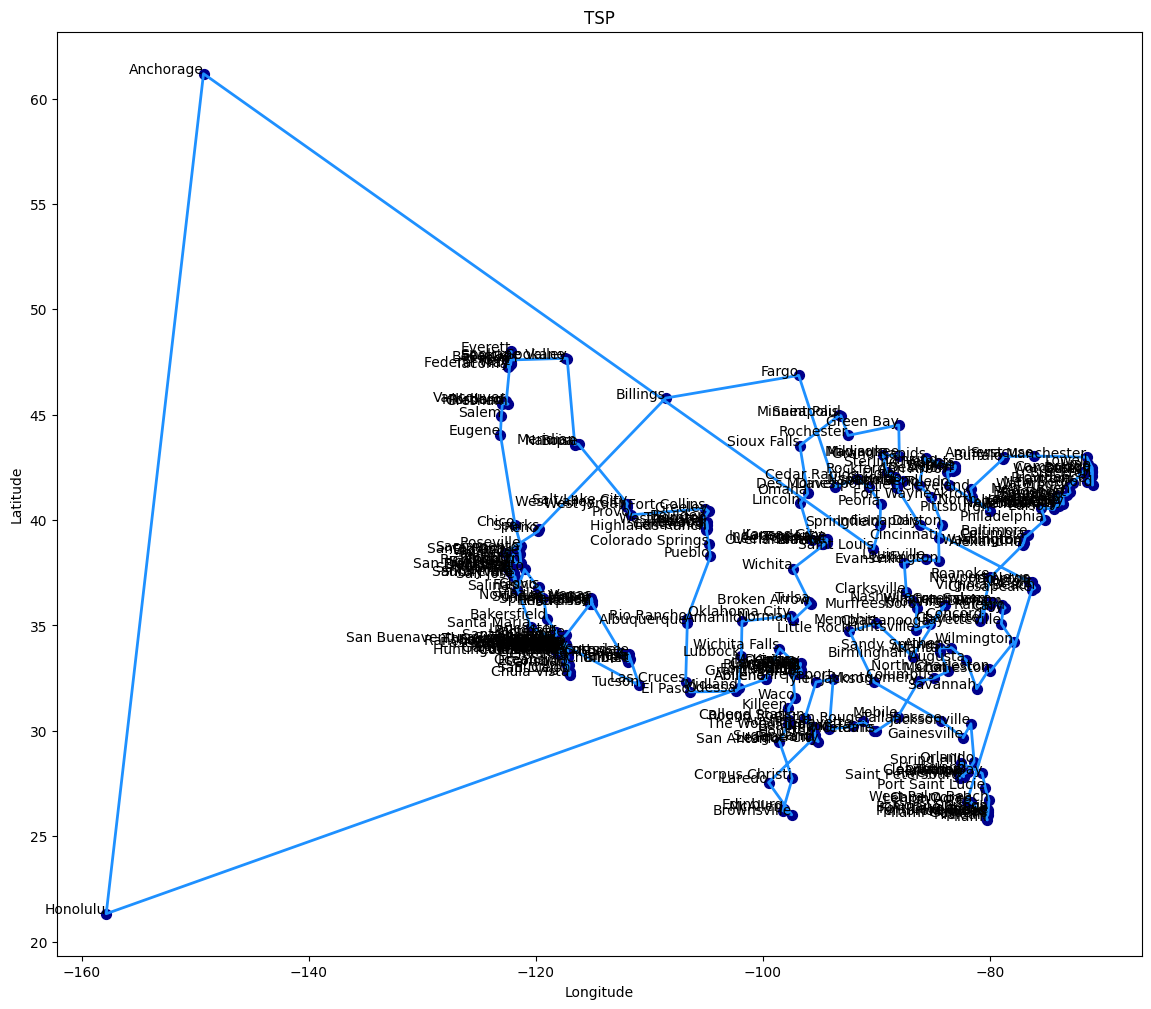

step: Isangel -> Vila (223.00km)
step: Vila -> Lakatoro (206.74km)
step: Lakatoro -> Norsup (2.46km)
step: Norsup -> Luganville (67.09km)
step: Luganville -> Port Olry (52.02km)
step: Port Olry -> Longana (105.77km)
step: Longana -> Sola (165.49km)
step: Sola -> Isangel (652.96km)
result: Found a path of 8 steps, total length 1475.53km


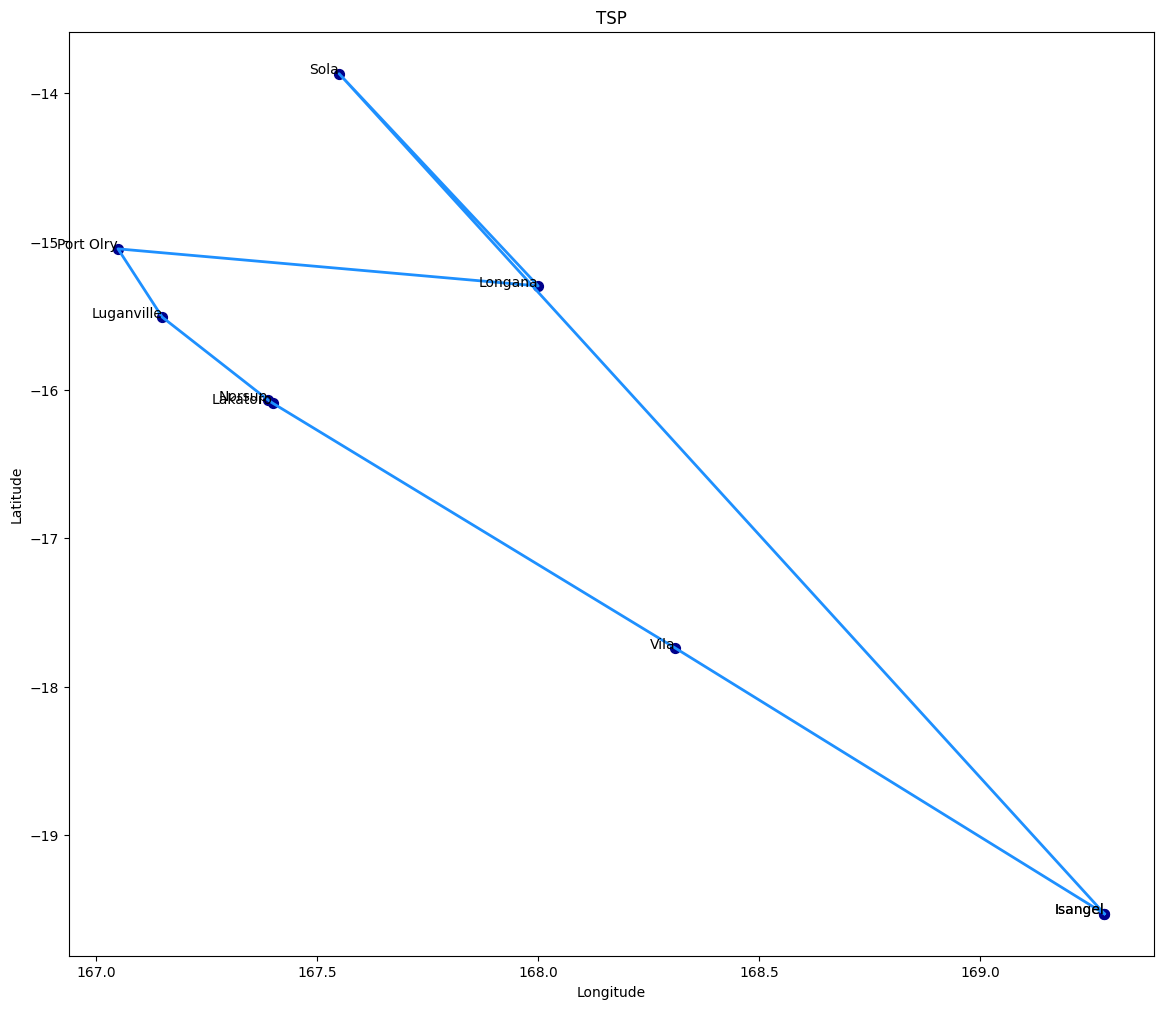

In [167]:
# Main-like code, it iterates over all the cities and calculates the best tsp by using a greedy algorithm and makes several plots of the maps and the history of the costs

CITIES_LIST = {'cities/china.csv', 'cities/italy.csv', 'cities/russia.csv', 'cities/us.csv', 'cities/vanuatu.csv'}
for path in CITIES_LIST:
    CITIES, DIST_MATRIX = readCSV(path)
    tsp = greedy_algorithm(CITIES, DIST_MATRIX)
    generate_map(tsp, CITIES, path, "GA")
    plot_map(tsp, CITIES)

## Evolutionary Algorithm

In [168]:
# Initial Data

population_size=100         # Number of routes in the population.
generations=500             # Number of generations to evolve.
mutation_rate=0.1           # Probability of mutating a route.

In [169]:
# Function to calculate route cost
def route_cost(route, DIST_MATRIX):
    """Calculate the total distance of a given TSP route."""
    return sum(DIST_MATRIX[route[i], route[i + 1]] for i in range(len(route) - 1)) + DIST_MATRIX[route[-1], route[0]]

In [170]:
# Function to initialize population with random routes
def initialize_population(CITIES):
    """Generate initial population of random TSP routes."""
    population = []
    for _ in range(population_size):
        tsp = random.sample(range(len(CITIES)), len(CITIES))
        tsp.append(tsp[0])
        population.append(tsp)
    return population

In [171]:
# Function that selects the best routes
def selection(population, DIST_MATRIX, CITIES):
    """Select a pair of parents from the population based on their cost."""
    costs = []
    
    for route in population:
        costs.append((route, tsp_cost(route, CITIES, DIST_MATRIX)))
    sorted_population = sorted(costs, key=lambda x: x[1])
    
    return [route for route, _ in sorted_population[:population_size // 2]]  # Keep the top half

In [172]:
# Crossover Function
def crossover(parent1, parent2):
    """Create a child route by combining elements from parent1 and filling in the remaining from parent2."""
    size = len(parent1)
    child = [None] * size

    # Step 1: Select random elements equal to half the length of parent1 and copy these selected elements from parent1 into the child
    indices = random.sample(range(size-1), size // 2)
    
    for i in indices:
        child[i] = parent1[i]

    # Step 2: Fill in the remaining positions with elements from parent2, in order
    pointer = 0
    for city in parent2:
        if city not in child:
            # Move pointer to the next empty spot in child
            while child[pointer] is not None:
                pointer += 1
            child[pointer] = city
    
    child[-1] = child[0]
    return child

In [173]:
# Mutation Function
def mutation(route):
    """Randomly swap two cities in the route to encourage exploration."""
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(route)-1), 2)
        route[i], route[j] = route[j], route[i]
        route[-1] = route[0]
    return route

In [174]:
# Definition of the evolutionary algorithm for the TSP problem
def evolutionary_algorithm(CITIES, DIST_MATRIX):
    """Evolutionary algorithm to solve the TSP problem."""

    # Evolutionary process
    population = initialize_population(CITIES)
    best_route, best_cost = None, float('inf')
    history = []
    
    
    for _ in range(generations):
        # Selection
        selected = selection(population, DIST_MATRIX, CITIES)
        
        # Generate offspring
        offspring = []
        while len(offspring) < population_size:
            parent1, parent2 = random.sample(selected, 2)
            child = crossover(parent1, parent2)
            child = mutation(child)
            offspring.append(child)
        
        # Replace the old population with new offspring
        population = offspring
        
        # Track the best solution in this generation
        for route in population:
            
            cost = route_cost(route, DIST_MATRIX)
            if cost < best_cost:
                best_route, best_cost = route, cost
        
        history.append(best_cost)
        
    print(f"result: Found a path of {len(best_route)-1} steps, total length {best_cost:.2f}km")
    
    return best_route, best_cost, history

result: Found a path of 167 steps, total length 53177.77km


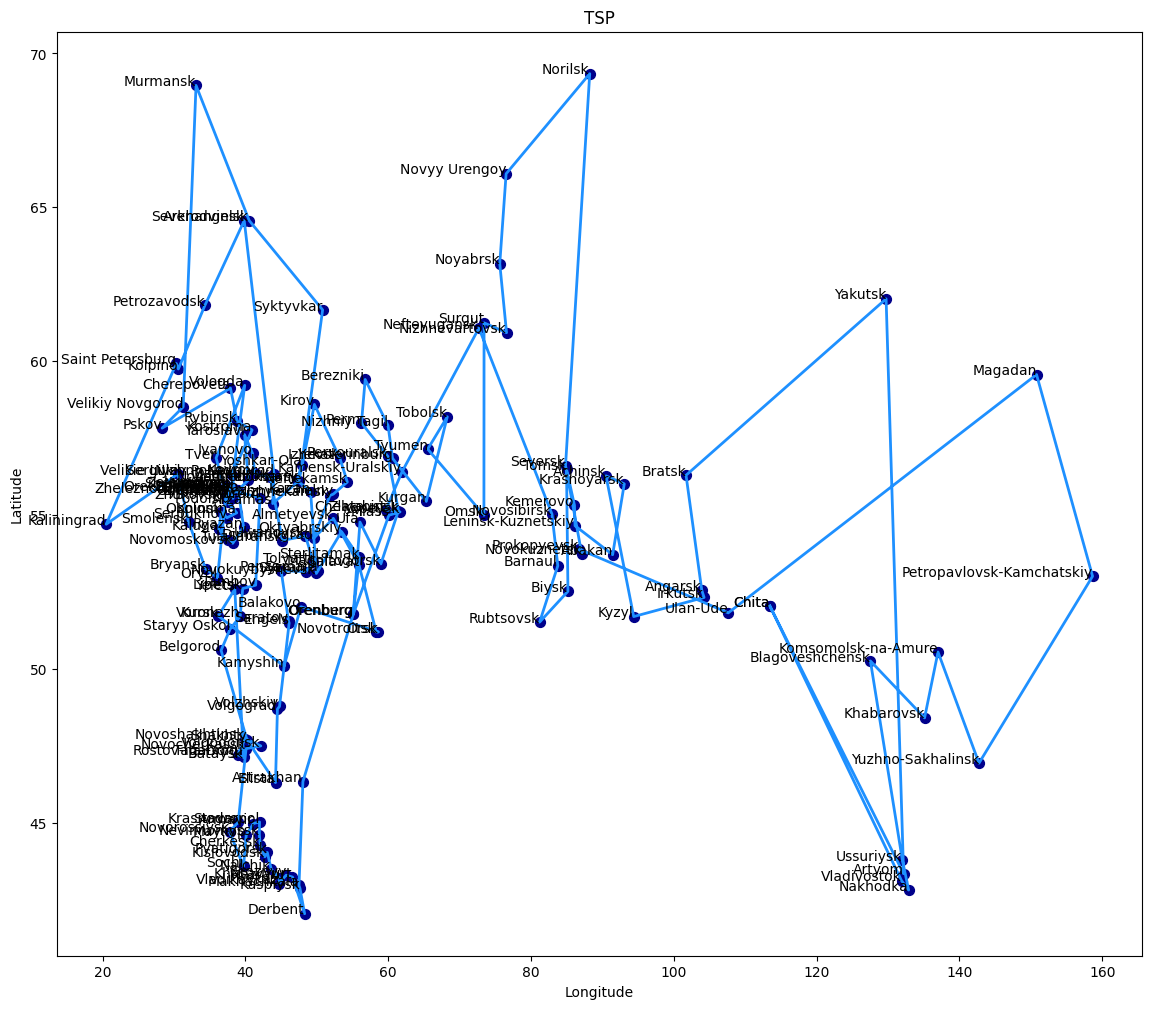

result: Found a path of 726 steps, total length 692846.33km


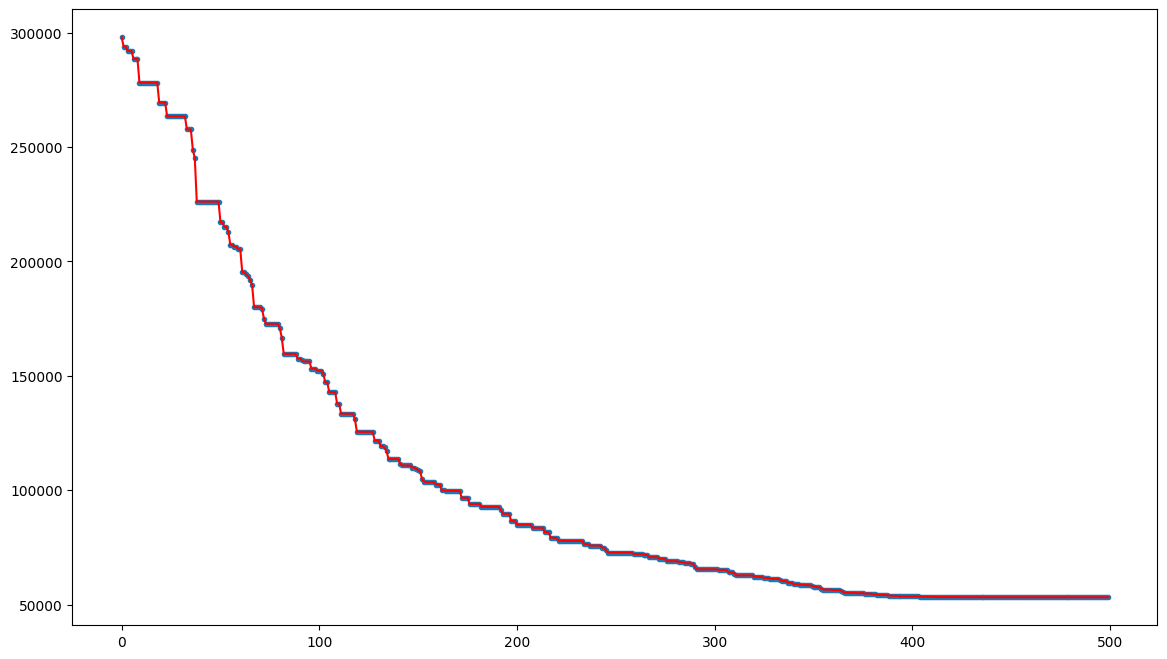

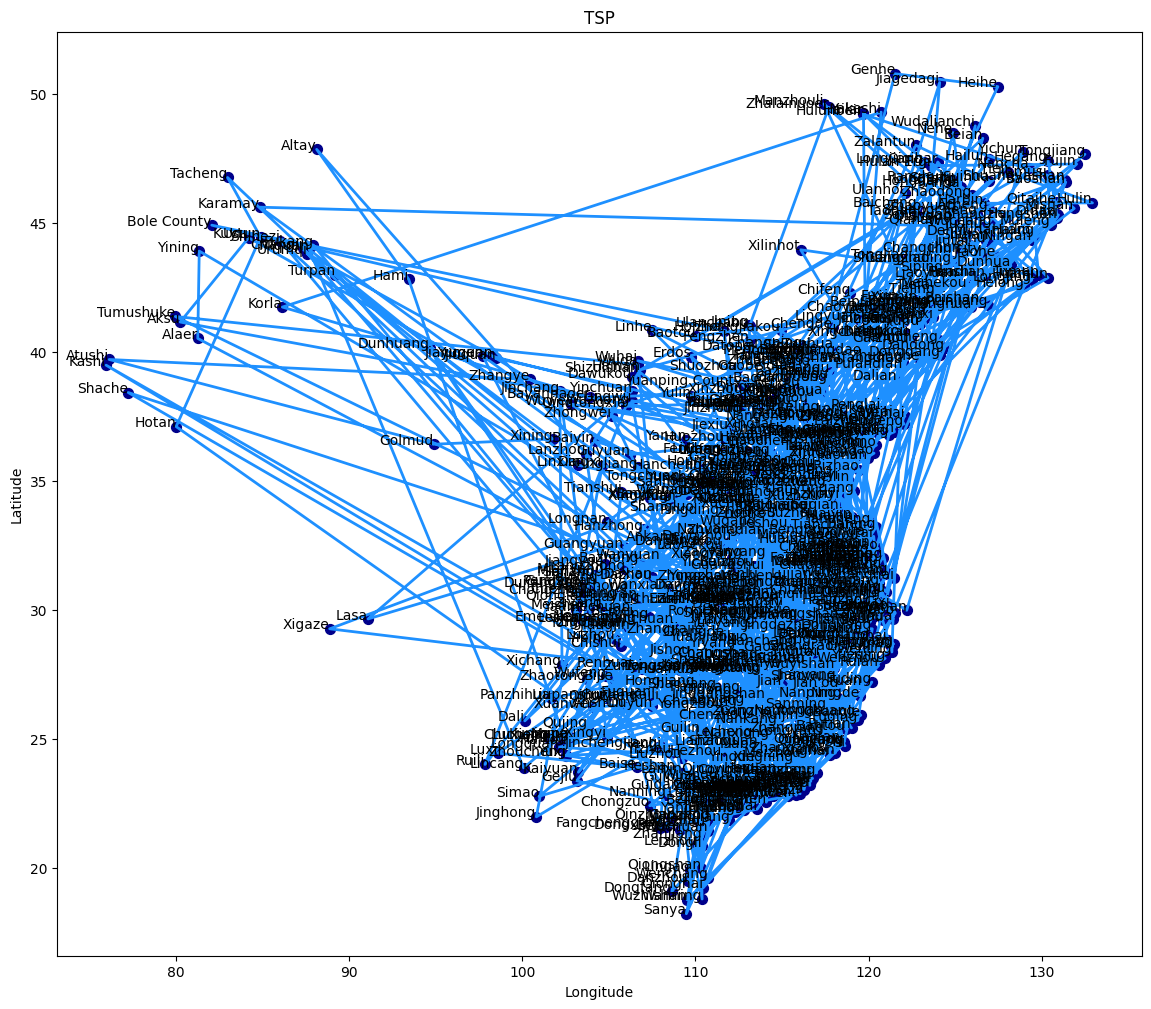

result: Found a path of 46 steps, total length 4442.54km


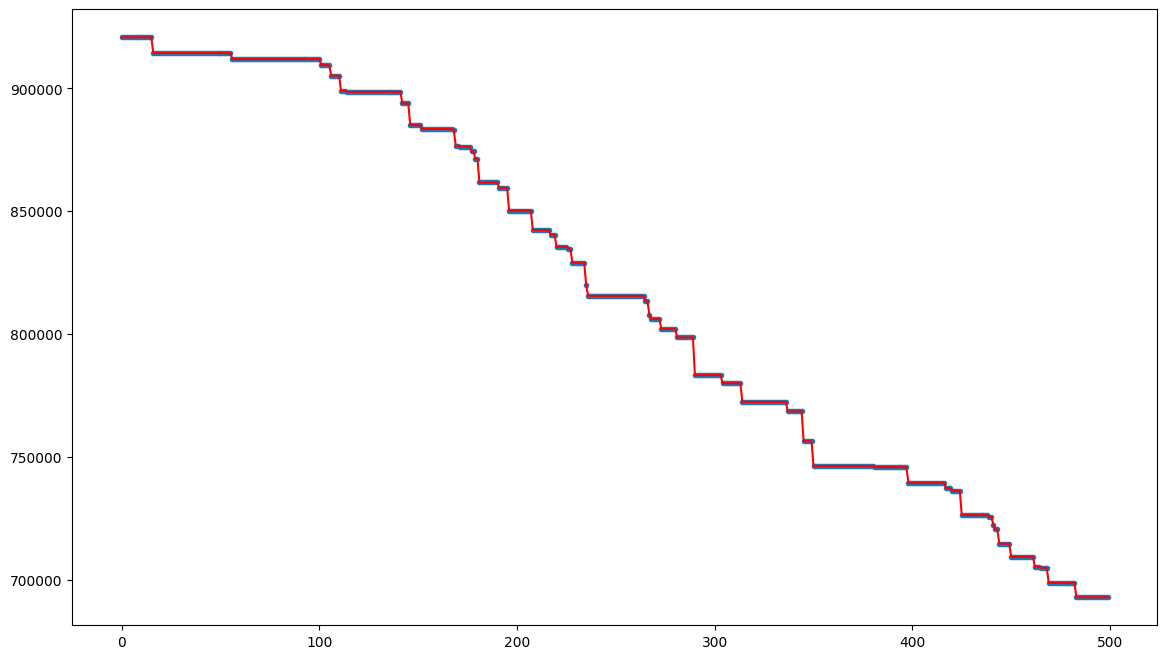

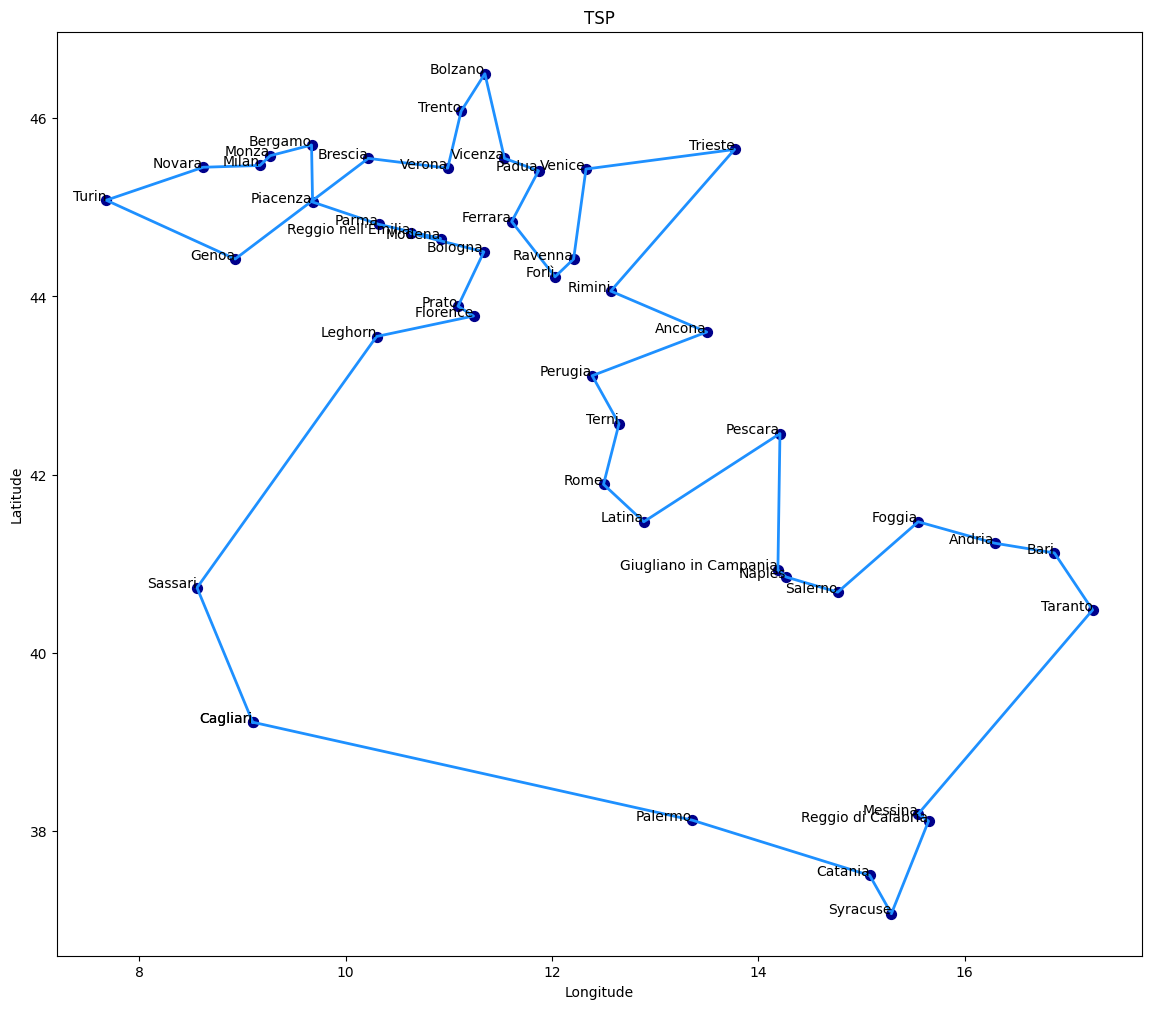

result: Found a path of 326 steps, total length 162248.26km


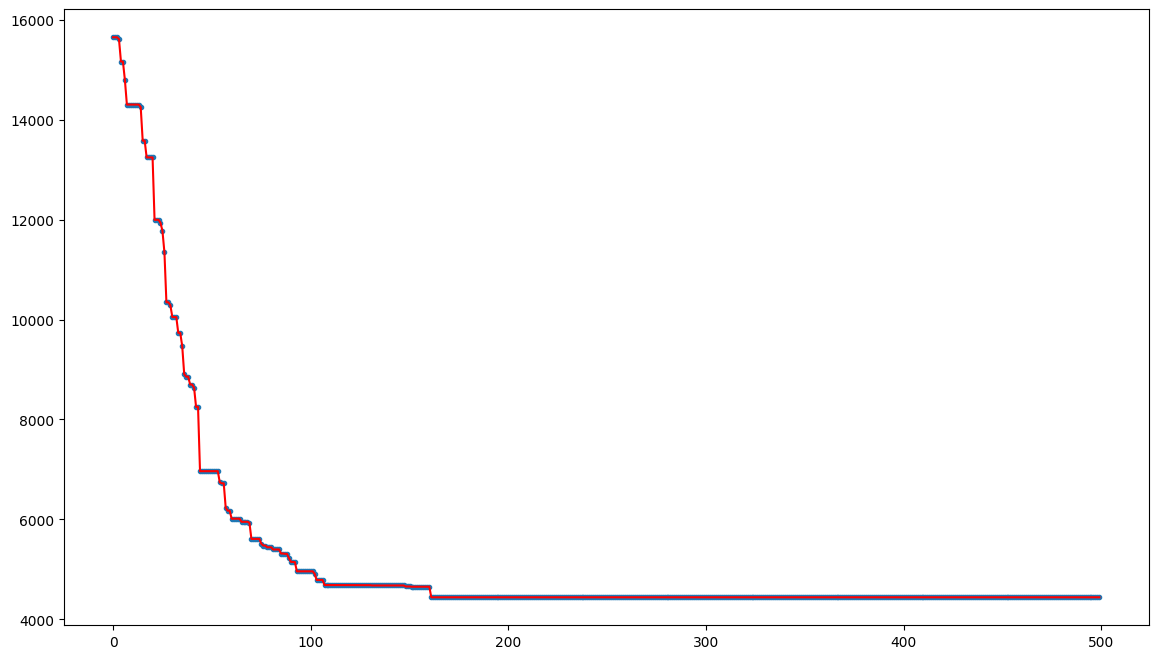

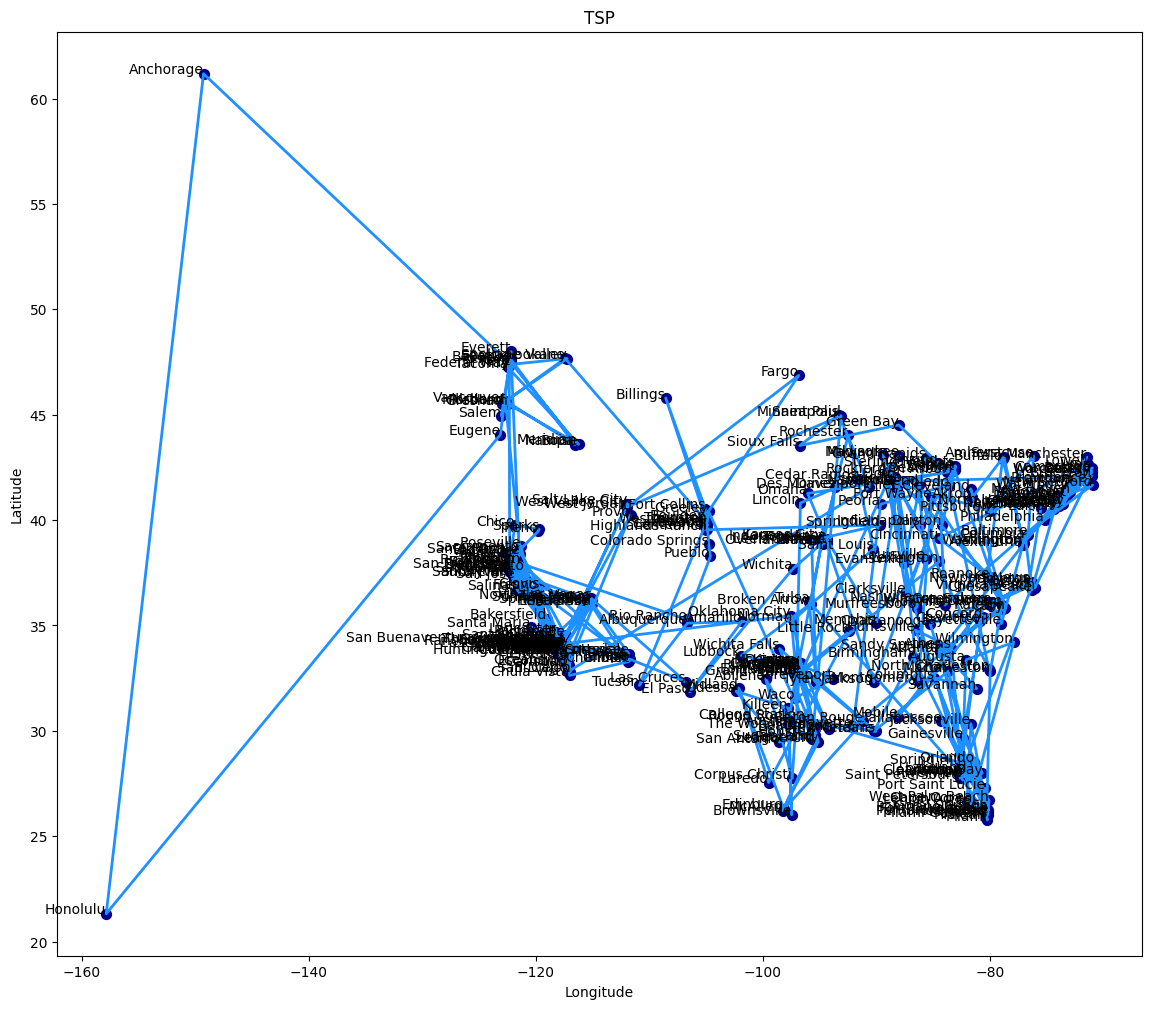

result: Found a path of 8 steps, total length 1345.54km


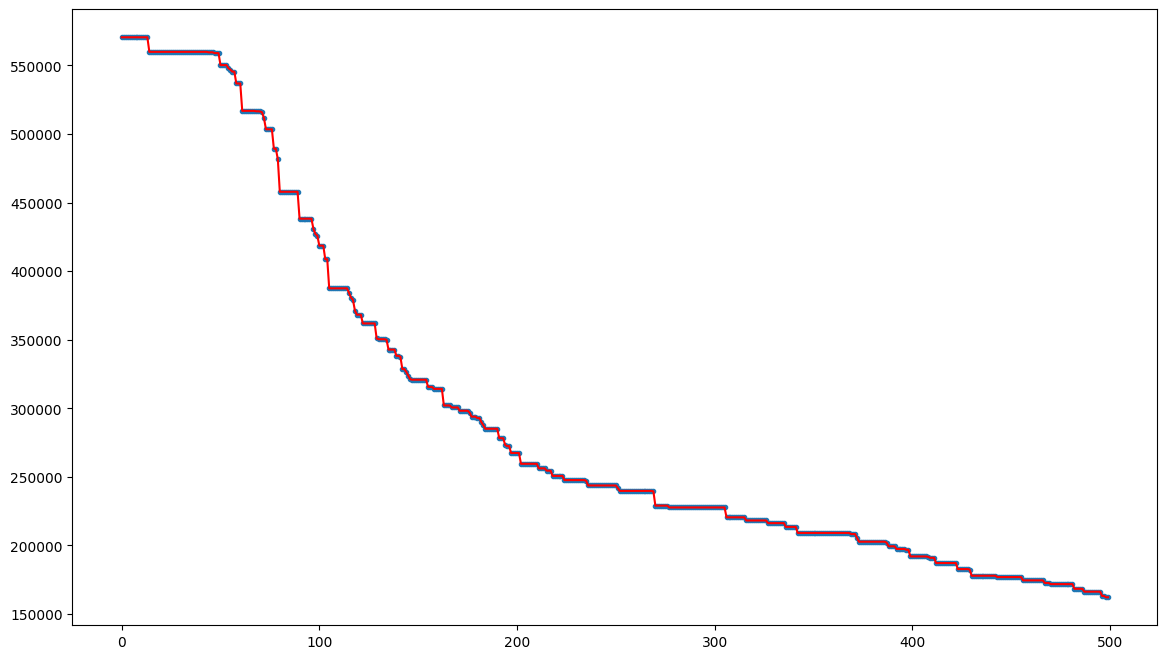

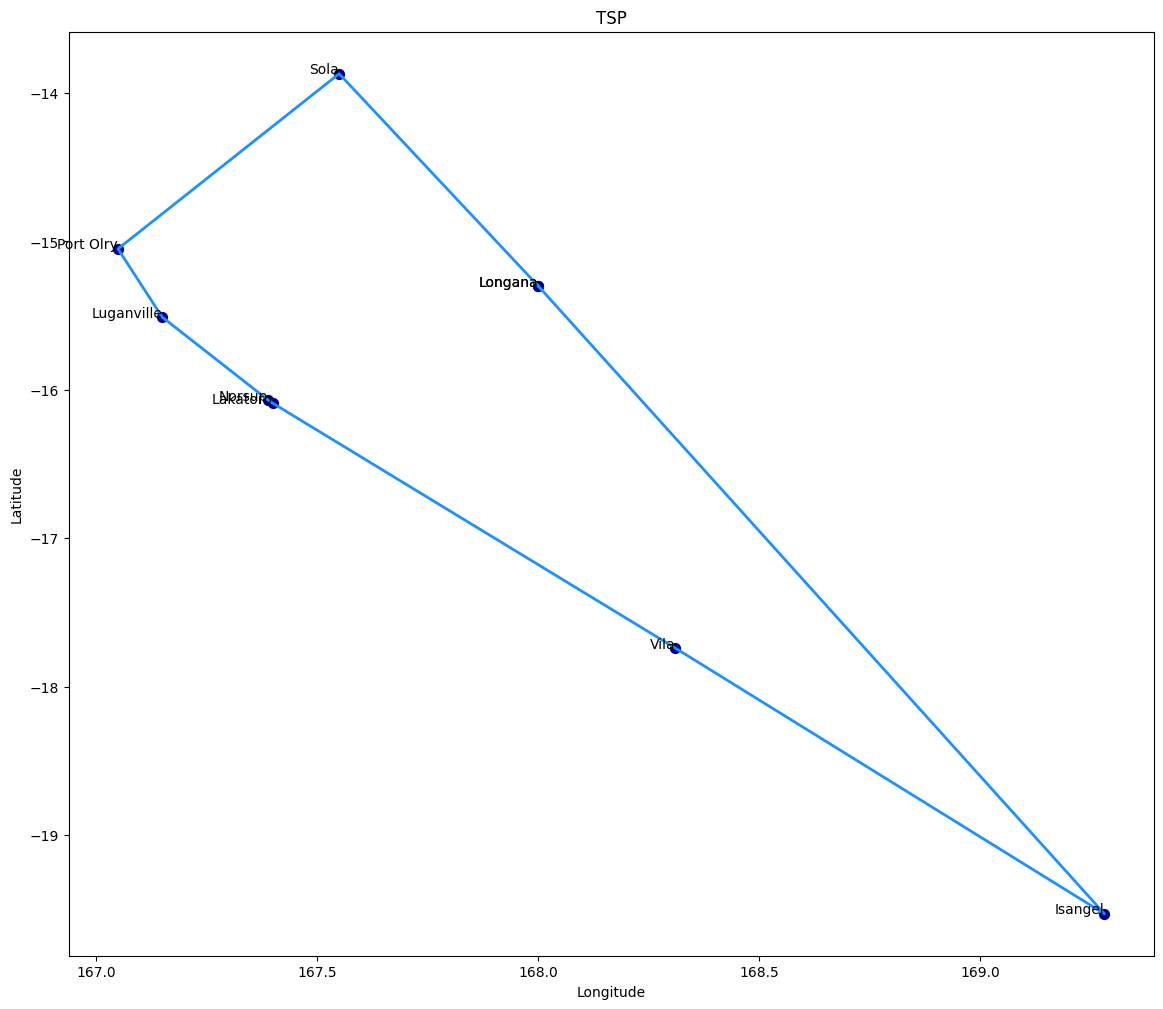

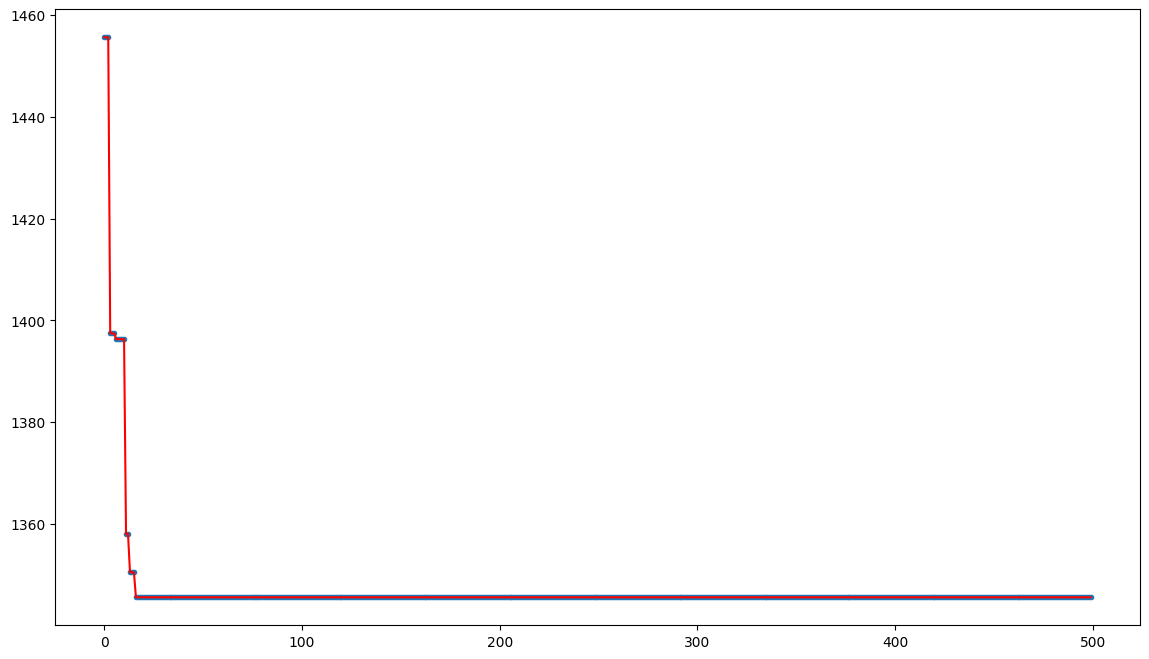

In [175]:
# Main-like code, it iterates over all the cities and calculates the best tsp by using an evolutionary algorithm and makes several plots of the maps and the history of the costs

CITIES_LIST = {'cities/china.csv', 'cities/italy.csv', 'cities/russia.csv', 'cities/us.csv', 'cities/vanuatu.csv'}
for path in CITIES_LIST:
    CITIES, DIST_MATRIX = readCSV(path)
    best_route, best_cost, history = evolutionary_algorithm(CITIES, DIST_MATRIX)
    generate_map(best_route, CITIES, path, "EA")
    plot_map(best_route, CITIES)
    plotcost(history)